# Part I - (ProsperLoan Data Exploration)
## by (Abimbola Akinjobi)

## Introduction
> The dataset used for this project is the prosper Loan dataset. The dataset contains details about loans including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan.shape

(113937, 81)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [3]:
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].astype("category")

Based on the variable definitions for the dataset, listing category which currently has numbers as it's variable would be subsituted with the  category of the listing that the borrower selected when posting their listing.

In [4]:
ListingCategoryVariables = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
                            5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
                            11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
                            15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

In [5]:
loan['ListingCategory'] = loan['ListingCategory (numeric)'].map(ListingCategoryVariables)

In [6]:
loan.ListingCategory.value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [6]:
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])

In [7]:
loan = loan.rename(columns= {'ProsperRating (Alpha)':'ProsperRating'})

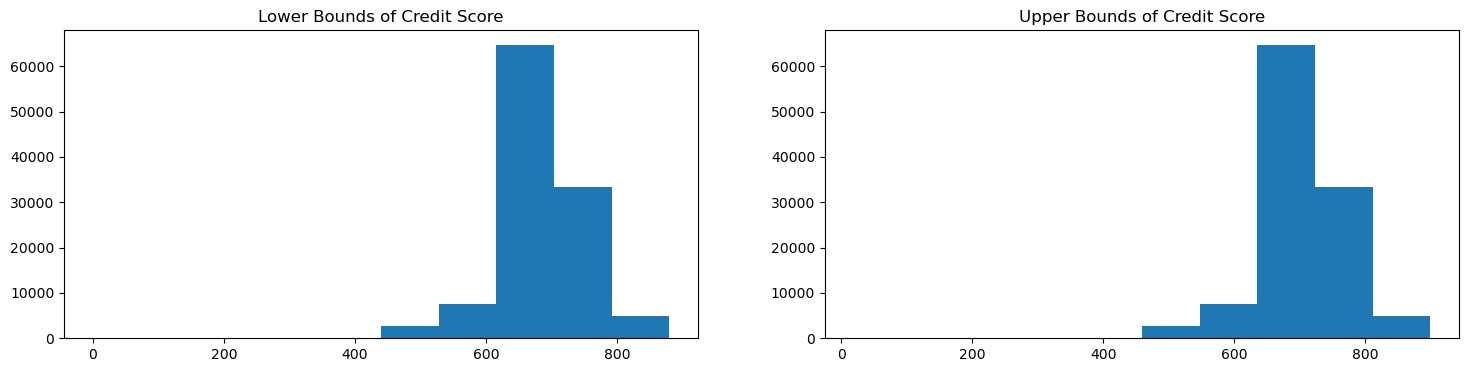

In [8]:
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
plt.hist(data = loan, x = 'CreditScoreRangeLower');
plt.title('Lower Bounds of Credit Score');
plt.subplot(1,2,2)
plt.hist(data = loan, x = 'CreditScoreRangeUpper');
plt.title('Upper Bounds of Credit Score');

#### I was curious about the dynamics of the credit score, the upper and lower bound appear to have the same values

In [12]:
mark_columns = ['Term', 'LoanStatus', 'ProsperScore', 'ProsperRating', 'ListingCategory', 'BorrowerRate', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate' ]

In [13]:
loan_df = loan[mark_columns]

In [14]:
list(loan_df)

['Term',
 'LoanStatus',
 'ProsperScore',
 'ProsperRating',
 'ListingCategory',
 'BorrowerRate',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'CreditScoreRangeUpper',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'LoanOriginalAmount',
 'LoanOriginationDate']

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Term                     113937 non-null  int64         
 1   LoanStatus               113937 non-null  object        
 2   ProsperScore             84853 non-null   float64       
 3   ProsperRating            84853 non-null   object        
 4   ListingCategory          113937 non-null  category      
 5   BorrowerRate             113937 non-null  float64       
 6   EmploymentStatus         111682 non-null  object        
 7   IsBorrowerHomeowner      113937 non-null  bool          
 8   CreditScoreRangeUpper    113346 non-null  float64       
 9   CurrentDelinquencies     113240 non-null  float64       
 10  AmountDelinquent         106315 non-null  float64       
 11  DelinquenciesLast7Years  112947 non-null  float64       
 12  StatedMonthlyInc

### What is the structure of your dataset?

> The prosper loan dataset has 113,937 rows of data and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> My interest is mostly on employment status, loan status and borrower's rate and see if these variables are influenced or influence other variables in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect employment status will have a positive effect on borrower's rate, I also think credit score and loan amount will have an impact on borrower's rate. I also expect most borrowers to have homes.

## Univariate Exploration


### What term is the highest?

In [9]:
def labels (a, b, c):
    """
    Args:
    a (str): x-axis title(weight = "bold")
    b (str): y-axis title(weight = 'bold')
    c (str): main title(weight = 'bold')
    
    
    Returns:
    None
    """
    
    plt.xlabel(a, weight = 'bold')
    plt.ylabel(b, weight = 'bold')
    plt.title(c, fontsize = 14, weight = 'bold')
    plt.show()

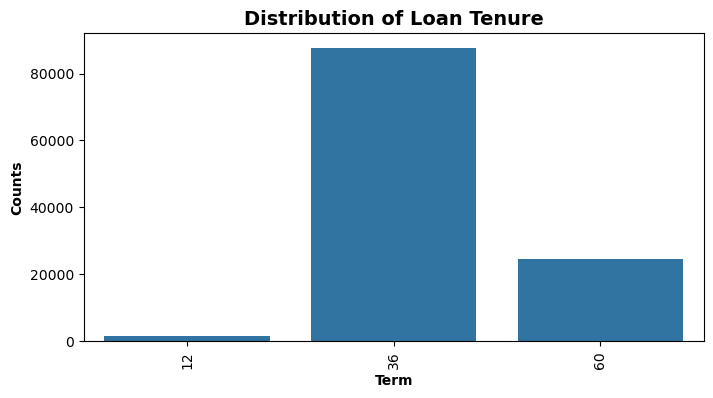

In [24]:
plt.figure(figsize=[8, 4])
base_color = sns.color_palette()[0] # To give uniform colour 
sns.countplot(data=loan_df, x='Term', color=base_color);
plt.xticks(rotation=90);
labels('Term', 'Counts', 'Distribution of Loan Tenure')

#### Loans with 36months term are the highest followed by 60 and 12. I may explore this further

In [10]:
type_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

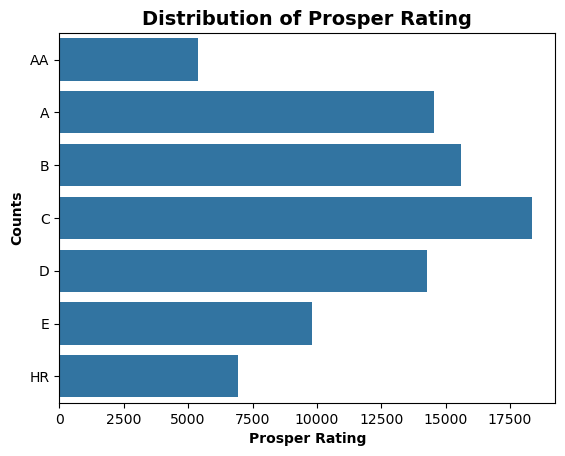

In [15]:
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, y='ProsperRating', color=base_color, order=type_order);
labels('Prosper Rating', 'Counts', 'Distribution of Prosper Rating')

#### The prosper for ratings low shows rating C to have the highest number if rates. The rating indicates 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA

In [16]:
loan_order = ['Current', 'Completed', 'FinalPaymentProgress', 'PastDue(1-15 days)', 'PastDue(16-30 days)','PastDue(31-60 days)', 
             'PastDue(61-90 days)', 'PastDue(90-120 days)', 'PastDue(>120 days)', 'Chargedoff', 'Defaulted', 'Cancelled']

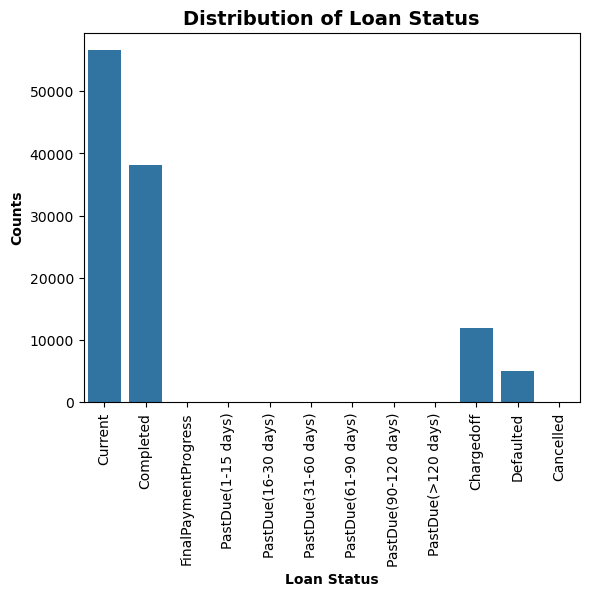

In [20]:
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, x='LoanStatus', color=base_color, order=loan_order);
plt.xticks(rotation=90);
labels('Loan Status', 'Counts', 'Distribution of Loan Status')

#### We have a lot of current loans, this will be explored further

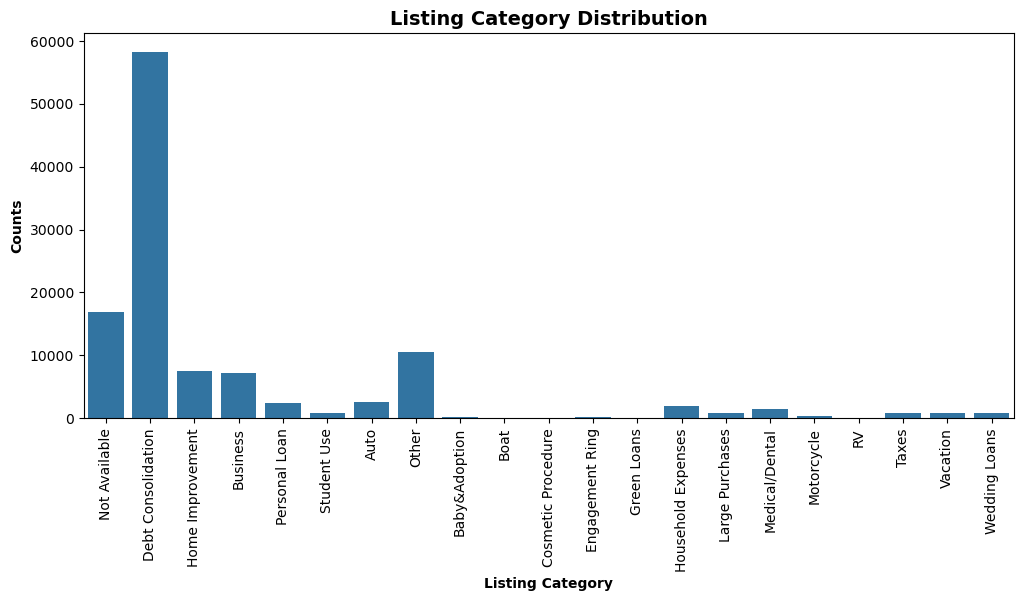

In [23]:
plt.figure(figsize=[12, 5])
sns.countplot(data=loan_df, x='ListingCategory', color=base_color);
plt.xticks(rotation=90);
labels('Listing Category', 'Counts', 'Listing Category Distribution')

#### This shows the distribution of the listing category



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### What is the distribution of employment status?

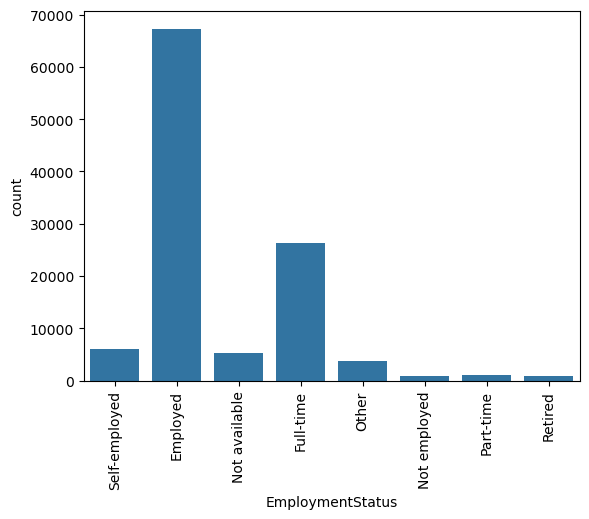

In [24]:
sns.countplot(data = loan_df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);

#### Loans appear to be disbursed to employed individuals and those will full time jobs compared to other status

### What is the average loan disbursed?

Mean loan amount:  $8337.01


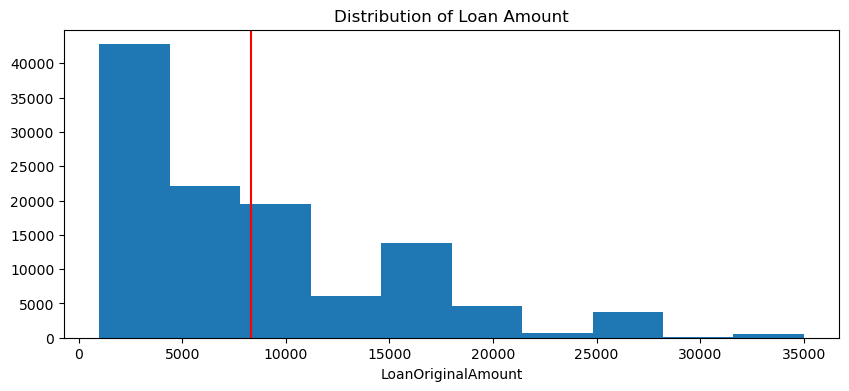

In [30]:
loan_mean = loan_df.LoanOriginalAmount.mean()
print('Mean loan amount:  ${:0.2f}'.format(loan_mean))
plt.figure(figsize=[10, 4])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', color = base_color)
plt.xlabel('LoanOriginalAmount');
plt.axvline(x=loan_mean, color='r'); #add red colour to indicate mean 
plt.title('Distribution of Loan Amount');

#### The histogram is rightly skewed showing that there are more loans above the average amount of $8337.01

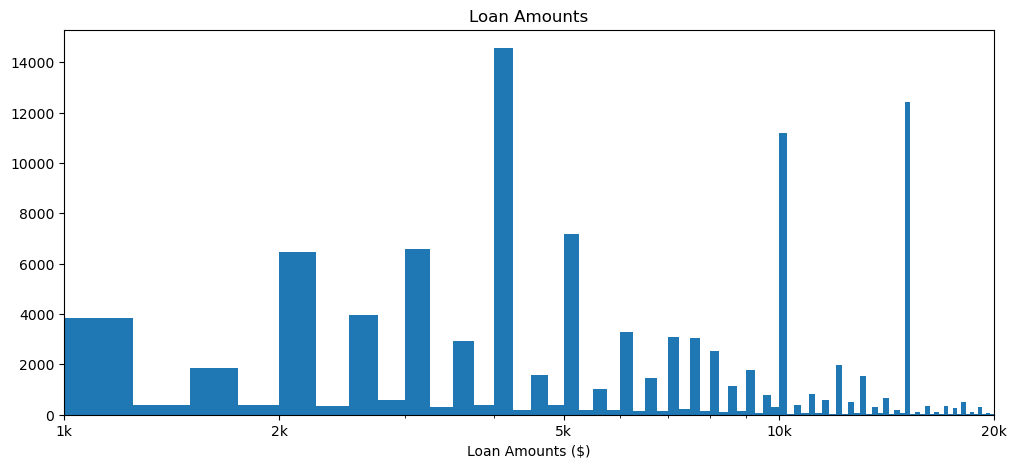

In [17]:
# Log transformation on loan amounts to see distribution better
bins = np.arange(loan_df['LoanOriginalAmount'].min()-250, loan_df['LoanOriginalAmount'].max()+250, 250)

plt.figure(figsize=[12, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k','10k', '20k', '50k'])
plt.xlabel('Loan Amounts ($)');
plt.xlim(1000, 20000) #zoomed in for better visibility of spikes
plt.title('Loan Amounts');

#### Although there are more loans above the average anount, we can see a huge spike in 4,000, 10,000 and 15,000

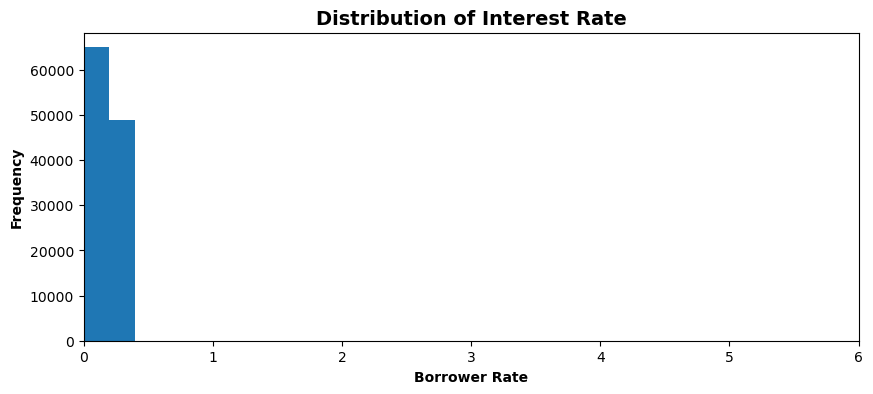

In [25]:
plt.figure(figsize=[10, 4])
bins = np.arange(0, loan_df['BorrowerRate'].max()+0.2, 0.2)
plt.hist(data=loan_df, x='BorrowerRate', bins=bins);
plt.xlim((0,6));
labels('Borrower Rate', 'Frequency', 'Distribution of Interest Rate')

Mean borrower interest rate:  0.2


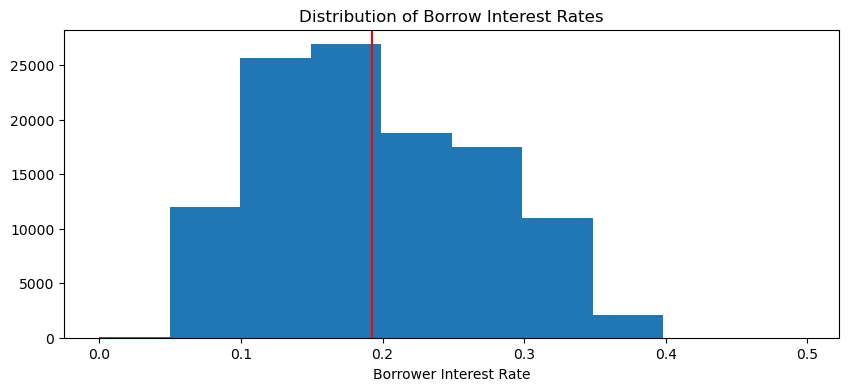

In [33]:
rate_mean = loan_df.BorrowerRate.mean()
print('Mean borrower interest rate:  {:0.1f}'.format(rate_mean))
base_color = sns.color_palette()[0]
plt.figure(figsize=[10, 4])
plt.hist(data = loan_df, x = 'BorrowerRate', color = base_color)
plt.xlabel('Borrower Interest Rate');
plt.axvline(x=rate_mean, color='r');
plt.title('Distribution of Borrow Interest Rates');

#### The average borrower rate(interest rate) is 0.2. It'll be nice to see its effects on other parameters or see how other parameters affect it

### Do most borrowers own homes?

In [18]:
loan_df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

#### The difference between those that own homes and those that do not is not as staggering as I thought. I though I would see a huge difference to determine if that influences loan decision, I may explore this further.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan amount histogram was skewed, log transformation was done to get additional insight. There were spikes at loan amounts of 4,000, 10,000, and 15,000 after the log transformation. I also found the average of Borrowerrate and Loan amount and looked at the distribution of the variables in relation to the averages.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distribution were noticed.I will be examining in further detail effect/affect of borrow interest rates. Also effect of employment status and impacts of BorrowerRate and Employment Status on Loan status.
>I removed unncessary columns to make my data easy to work with, I also picked one credit range variable since they both(upper and lower) seem to contain the same data.

## Bivariate Exploration

In [19]:
numeric_vars = ['BorrowerRate', 'CreditScoreRangeUpper', 'AmountDelinquent','StatedMonthlyIncome', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'ListingCategory']

### What are the correlation between variables

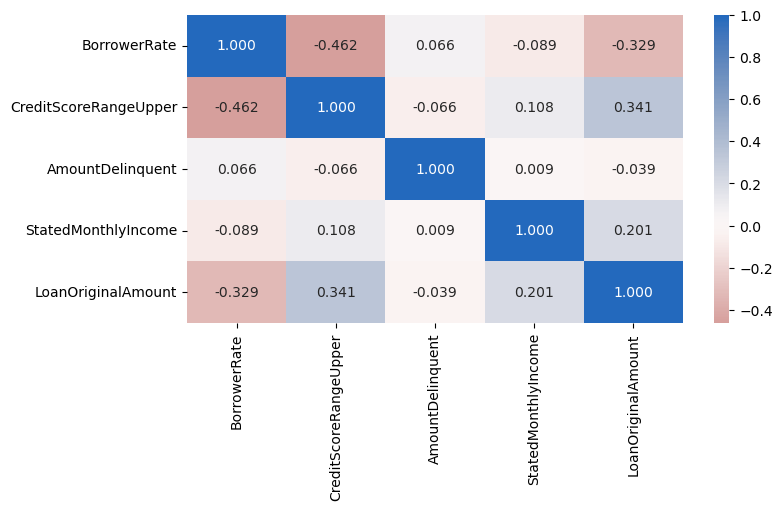

In [21]:
#Correlations between numeric variables
plt.figure(figsize = [8, 4])
sns.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

#### The correlations are not as strong as I thought, however, there seem to be a correlation between Credit score and Borrow Rate

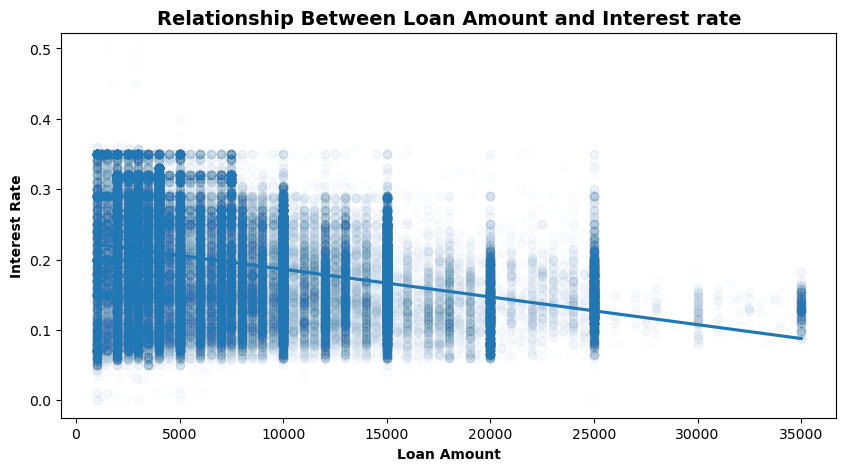

In [21]:
plt.figure(figsize = [10, 5])
sns.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
labels('Loan Amount', 'Interest Rate', 'Relationship Between Loan Amount and Interest rate')

#### This plot shows that at Borrower Rate is negatively correlated with loan amount. As the loan amount increases, the Borrower rate reduces.

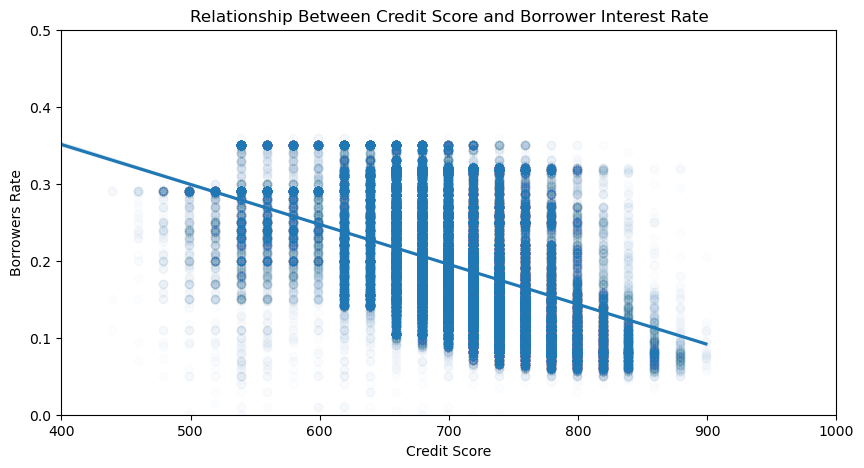

In [25]:
plt.figure(figsize = [10, 5])
sns.regplot(data = loan_df, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
plt.xlim(400, 1000);
plt.ylim(0, .5);
plt.xlabel('Credit Score');
plt.ylabel('Borrower''s Rate');
plt.title('Relationship Between Credit Score and Borrower Interest Rate');

#### The scatter plot shows a weak negative relationship between the two variables, as the credit score increases, the interest rate decreases.

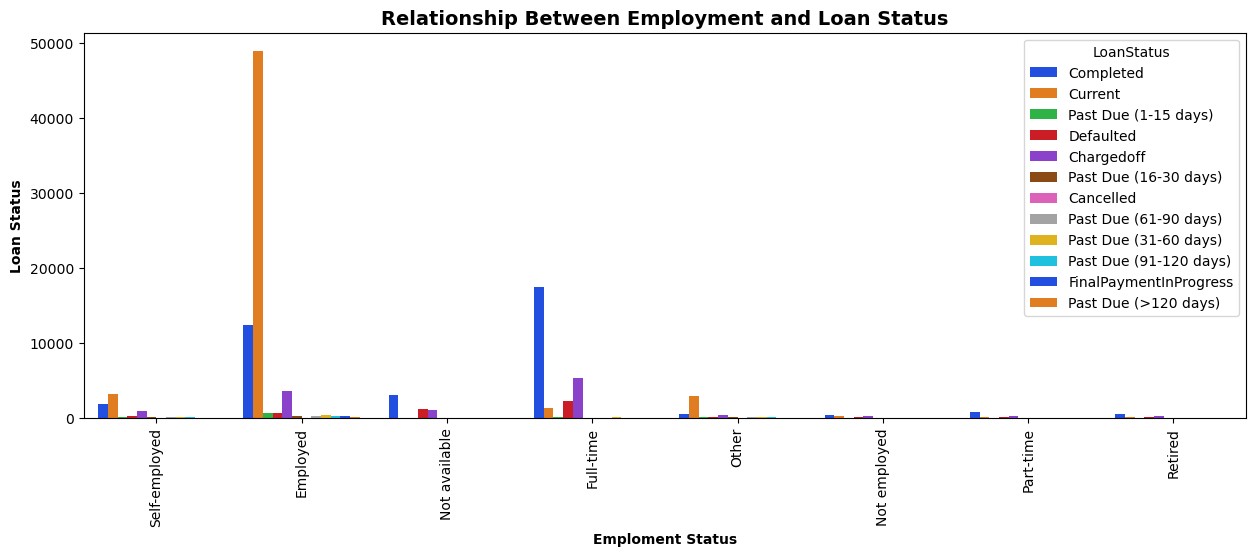

In [22]:
plt.figure(figsize = [15, 5])
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue ='LoanStatus' , palette = 'bright')
plt.xticks(rotation=90);
labels('Emploment Status', 'Loan Status', 'Relationship Between Employment and Loan Status')

#### Employed individuals have the highest number of current/active loans, employed and full time also shows the highest amnount of completed loans.

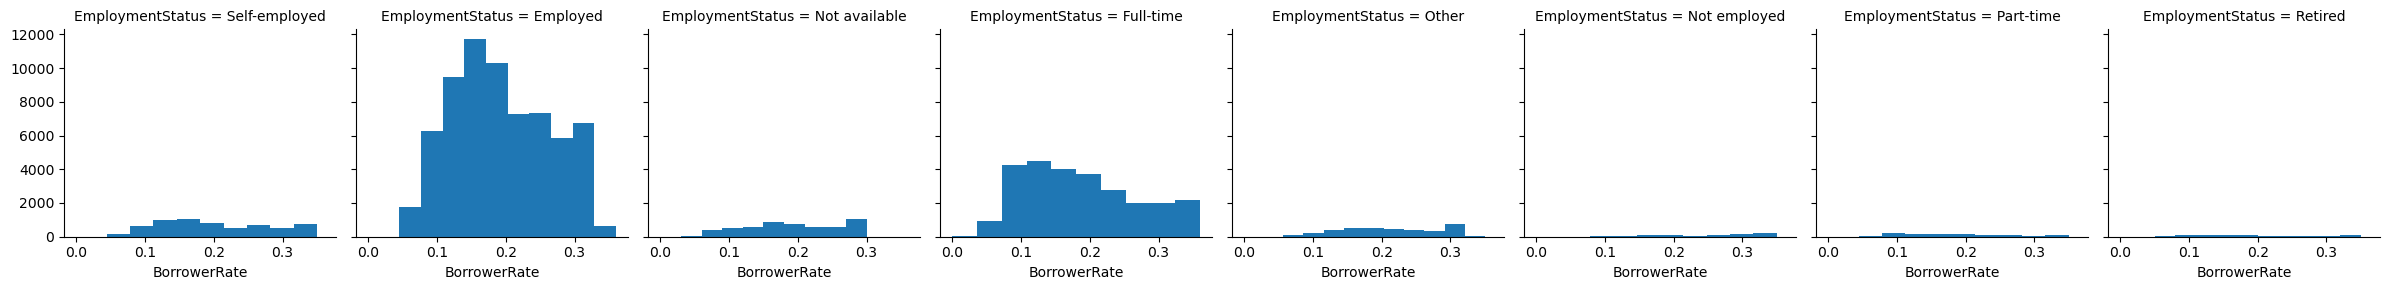

In [29]:
g = sns.FacetGrid(data = loan_df, col = 'EmploymentStatus')
g.map(plt.hist, "BorrowerRate");

#### Borrower rate is influenced by employment status as we can see that employed individuals(and) with full time jobs have large borrower's rate. Self employed individuals too have interest rates on their loans. It would appear though that loan amount have more impact on borrower's rate.

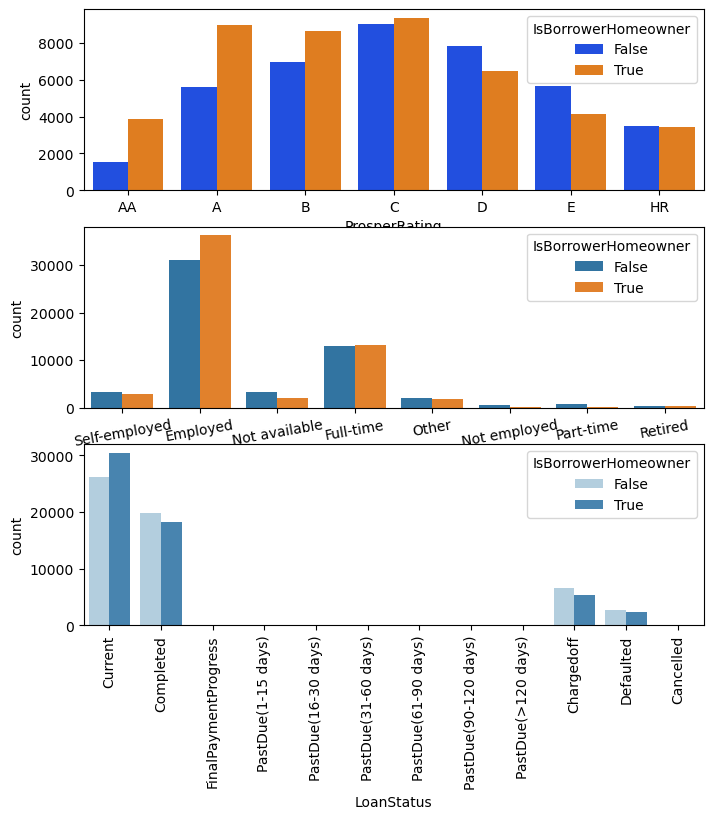

In [28]:
plt.figure(figsize = [8, 8])

# Just curious about home distribution for these metrics
plt.subplot(3, 1, 1)
sns.countplot(data = loan_df, x = 'ProsperRating', hue = 'IsBorrowerHomeowner', palette = 'bright', order=type_order);

ax = plt.subplot(3, 1, 2)
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner');
plt.xticks(rotation = 10);


ax = plt.subplot(3, 1, 3)
sns.countplot(data = loan_df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues', order=loan_order);
plt.xticks(rotation = 90);

#### I was curious about home distribution of borrowers, although there was not much different when looking at the variable alone, this analysis show more variations in borrowers with prosperrating A, employed borrowers and borrowers with current loans. However, there is no other evidence to suggest to it has major impact on other variables.

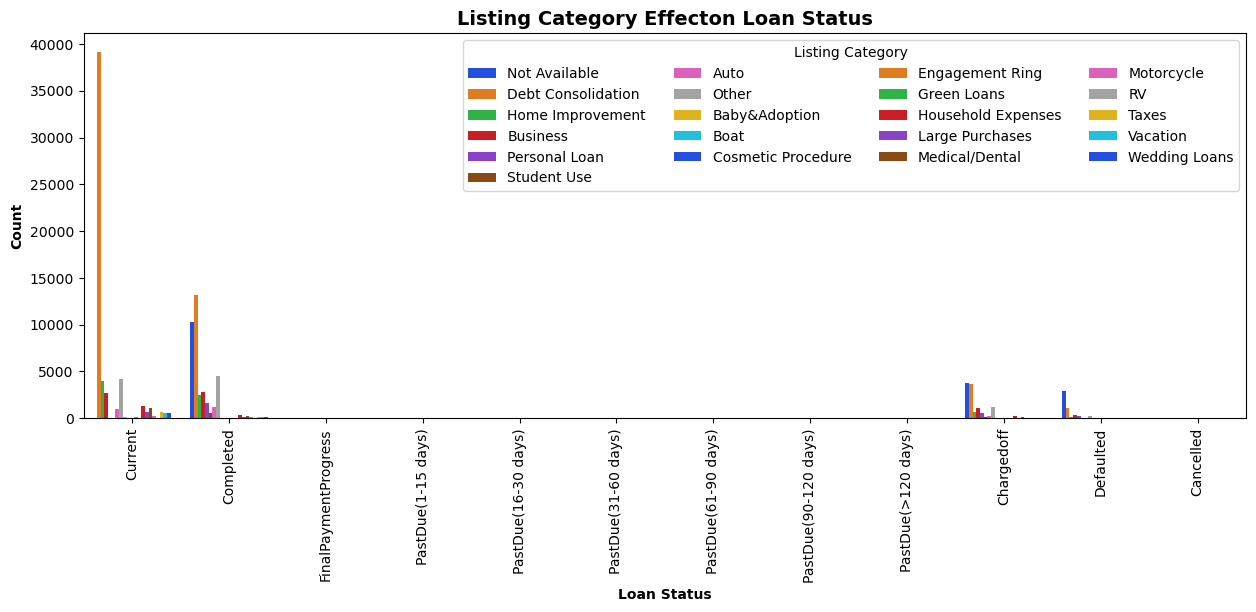

In [26]:
# Plot Listing Category againstLoan Status
plt.figure(figsize = [15, 5])
sns.countplot(data = loan, x = 'LoanStatus', hue = 'ListingCategory', palette = 'bright', order= loan_order)
plt.legend(loc = 1, ncol = 4, title= "Listing Category"); # re-arrange legend to reduce overlapping
plt.xticks(rotation=90);
labels('Loan Status', 'Count', 'Listing Category Effecton Loan Status')

#### Debt consolidationremains the highest type of loan for current loans while details about defaulted loans are not avaialable.

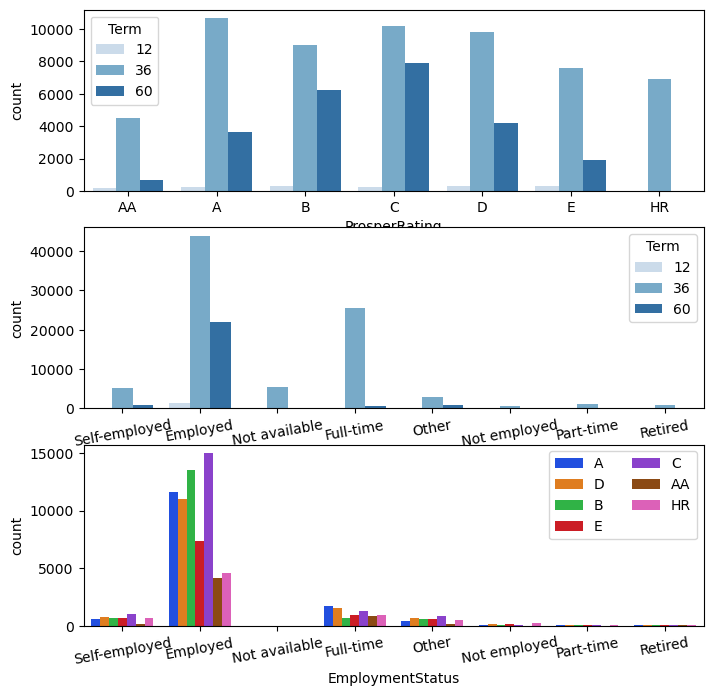

In [27]:
plt.figure(figsize = [8, 8])

# plot 1: Prosper rating against term
plt.subplot(3, 1, 1)
sns.countplot(data = loan_df, x = 'ProsperRating', hue = 'Term', palette = 'Blues', order=type_order)

# Plot 2: employment status against term
ax = plt.subplot(3, 1, 2)
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating against employment status
ax = plt.subplot(3, 1, 3)
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'ProsperRating', palette = 'bright')
ax.legend(loc = 1, ncol = 2);  # re-arrange legend to reduce overlapping
plt.xticks(rotation=10);

#### Loan terms with 36 months remain the highest as evident when compared against prosper rating and employment status. C prosper rating having the highest count for employed individuals, followed by B then D. Individuals with full time employment status have A as the highest prosper rating.

Text(0.5, 1.0, 'Relationship Between Employment Status and Borrower"s Rate')

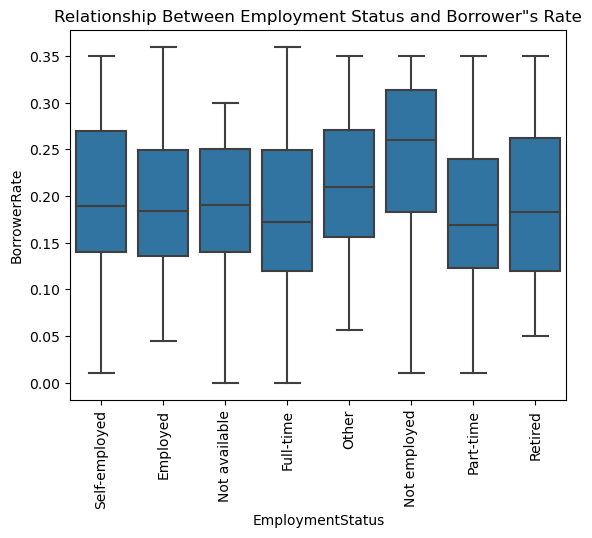

In [34]:
sns.boxplot(data = loan_df, x = 'EmploymentStatus', y = 'BorrowerRate', color = base_color);
plt.xticks(rotation=90);
plt.title('Relationship Between Employment Status and Borrower"s Rate')

#### The borrower's rate for employment status appears to be between 0.10 to 0.30. Loan amount and credit score appear to have more impact on borrower's rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I ran a heat map to see the correlations of the numeric variables and none had a strong relationship which was surprising. .

> 1. Borrower's rate(interest rate) is largely influenced by loan amount, the higher the loan amount, the lower the interest.
> 2. Although asmall correlation, Borrower's rate(interest rate) is also influenced by credit score, the higher the credit score, the lower the interest.
> 3. Employment rate does not really impact borrower's rate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> #### It was interesting to see the home distribution of borrowers, although there was not much different when looking at the variable alone, analysis showed more variations in borrowers with prosperrating A, employed borrowers and borrowers with current loans. However, there is no other evidence to suggest it has major impact on other variables.

## Multivariate Exploration

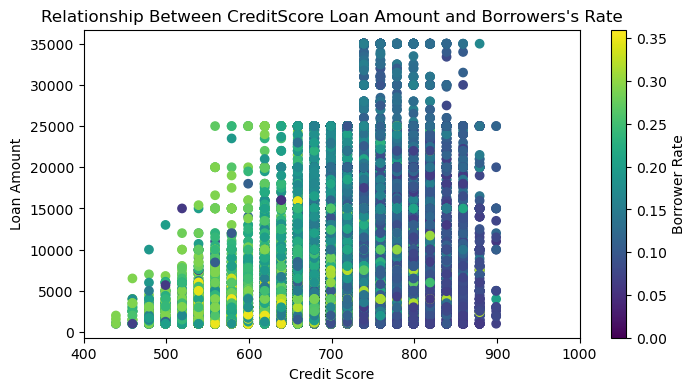

In [20]:
plt.figure(figsize=[8,4])
plt.scatter(data= loan_df, x='CreditScoreRangeUpper', y='LoanOriginalAmount', c='BorrowerRate');
plt.colorbar(label='Borrower Rate');
plt.xlim(400, 1000);
plt.ylabel('Loan Amount');
plt.xlabel('Credit Score');
plt.title("Relationship Between CreditScore Loan Amount and Borrowers's Rate");

#### As the borrower's credit score increases, the interest rate decreases.

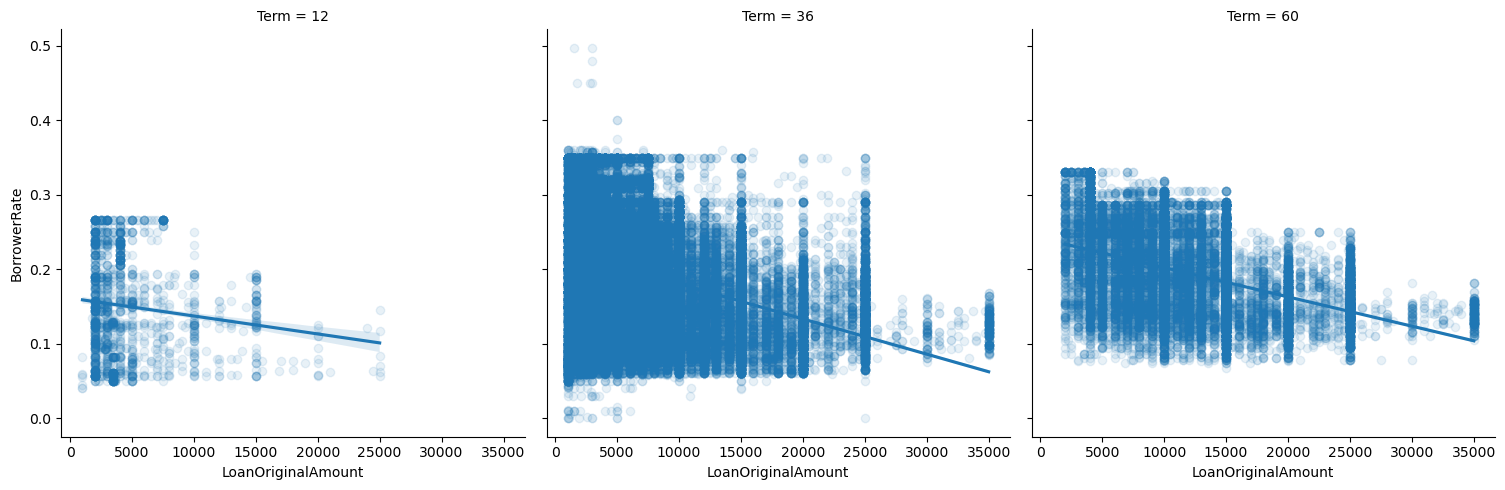

In [23]:
g=sns.FacetGrid(data=loan_df, height=5, col='Term', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
# "Effect of Term on Borrower's Rate and Loan Amount"

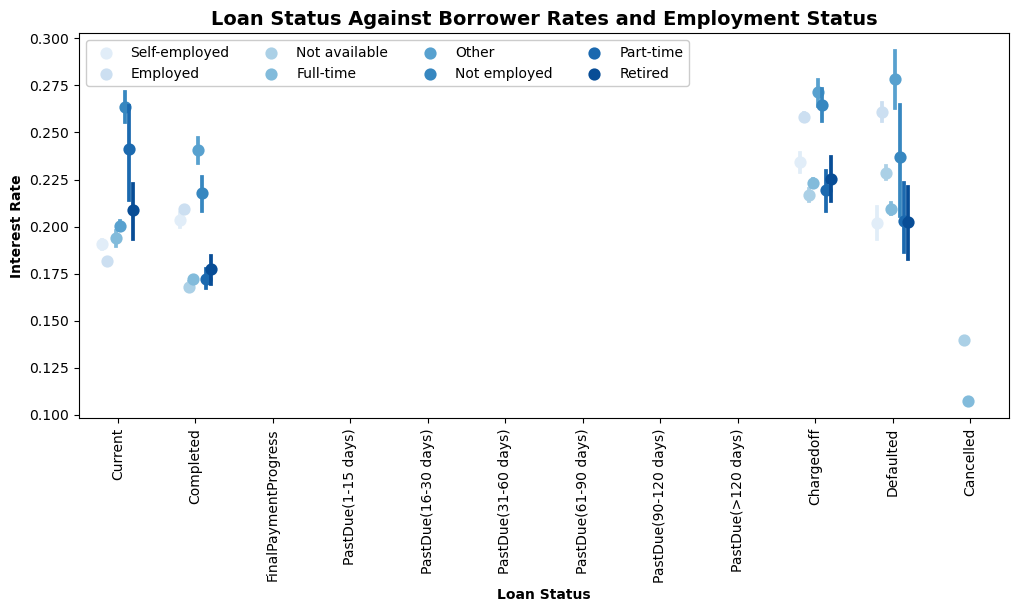

In [33]:
#Plot relationship of LoanStatus against Employment Status and Borrower Rate
plt.figure(figsize = [12, 5])
sns.pointplot(data = loan_df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus', order=loan_order,
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation= 90);
plt.legend(loc=2, ncol=4, framealpha=1);
labels('Loan Status', 'Interest Rate', 'Loan Status Against Borrower Rates and Employment Status');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>As the borrower's credit score increases, the interest rate decreases. There are a couple of instances where you can also see some affect of loan amount on the interest rate as well but it's not as dramatic.

### Were there any interesting or surprising interactions between features?
> Employment Status did not have as much impact as I expected


## Conclusions
> Overall, employed individuals have the highest current loan and the borrower's rate are influenced by ratings and loan amount with employed individuals having the highest amount of loan



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [27]:
loan_df.to_csv('loan_df.csv')